# import Libraries

In [26]:
from rasterData import *

# Split the Data

In [27]:
par_dir = 'C:/Users/SAMARTH/Desktop/MTP/mtp/'

map_data_tif_path = par_dir + 'data/merged_file_w_roads.tif'
output_data_dir = par_dir + 'data/tile_data_roads'

tile_size = 512
SPLIT_DATA = False


if(SPLIT_DATA):
    split_tif_into_tiles(map_data_tif_path, output_data_dir, tile_size)

# Merge according to bounding box

- Coordinates of bbox

In [28]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali (hanuman tibba - manali)
# lat1, lon1 = 32.372571, 76.983637
# lat2, lon2 = 32.189737, 77.315875

# Sissu Batal  [shape:  623 1986]
# lat1, lon1 = 32.474, 77.110
# lat2, lon2 = 32.306, 77.745

# Khanahr peak (small area testing)  [shape:  65 108]
# lat1, lon1 = 31.801535462745512, 76.97623916145938
# lat2, lon2 = 31.784061604490404, 77.01031292952429

# Griffon peak (small area testing)
lat1, lon1 = 31.800723508286747, 76.94858578581308
lat2, lon2 = 31.76176517190518, 76.99510825525397

# palan - sosan  [shape:  2272 3069]
# lat1, lon1 = 32.537047, 76.554121
# lat2, lon2 = 31.924304, 77.535921

# arnehar - mandi  [shape:  52 94]
# lat1, lon1 = 31.778518, 77.013229
# lat2, lon2 = 31.764576, 77.042884

# keylong - tosh
# lat1, lon1 = 32.553983959102354, 76.9572465564983
# lat2, lon2 = 32.02887381373745, 77.50664575756166

# menthosa - sosan
# lat1, lon1 = 32.90954351269039, 76.68373432249861
# lat2, lon2 = 31.863216801377973, 77.67972370282335

# lat1, lon1 = 31.737946830245892, 76.98328796870653
# lat2, lon2 = 31.70144173323603, 77.01350037105028

resolution = 30

bbox = (lon1, lat2, lon2, lat1) 

- merge the splitted tiles

In [29]:
merged_data_path  = par_dir + 'data/temp/file.tif'

mergeFiles(output_data_dir, merged_data_path, bbox)

2 files merged


- plot elvation and landcover

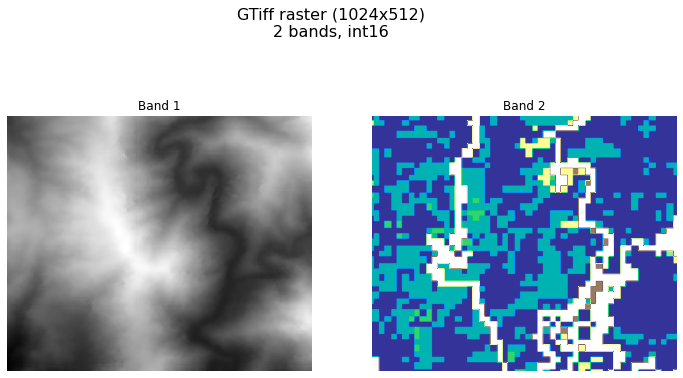

In [30]:
plot_multiband_raster(merged_data_path, bbox)

# Generate matrix

In [31]:
map_data,bounds, tf = getDataBoundingBox(merged_data_path, bbox)

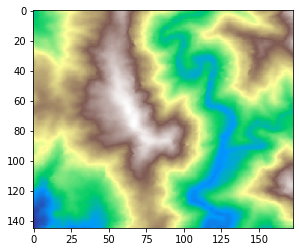

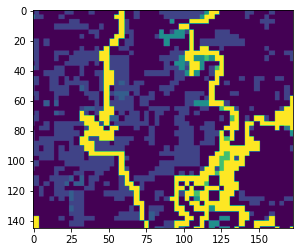

(2, 145, 173)
Elevation Map Info
Gray Map Shape: (145, 173)
Min: 846
Max: 1683


In [32]:
plt.imshow(map_data[0],cmap='terrain')
plt.show()
plt.imshow(map_data[1])
plt.show()
print(map_data.shape)

print("Elevation Map Info")
print(f"Gray Map Shape: {map_data[0].shape}")
print(f"Min: {map_data[0].min()}")
print(f"Max: {map_data[0].max()}")

# Source and Destination

In [33]:
# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

# src_lat, src_lon = 31.775167, 77.017773
# des_lat, des_lon = 31.772527, 77.029848

# Khanahr peak (small area testing) 
# src_lat, src_lon = 31.7887873925783, 76.9881056556389
# des_lat, des_lon = 31.79484414912616, 76.99711086936229

# palan
# src_lat, src_lon = 32.369789, 76.766289
# des_lat, des_lon = 32.076790, 77.312516

# Griffon peak from kamand bridge
src_lat, src_lon = 31.77730386806442, 76.96974603761053
des_lat, des_lon = 31.78026039724837, 76.98353775191406

# menthosa - sosan
# src_lat, src_lon = 32.80644936709285, 76.82298402202355
# des_lat, des_lon = 32.29517226314917, 77.4885503853536

src_latIdx, src_lonIdx = findIndexFromCoordinate(bbox, map_data[0], src_lon, src_lat)

- Incase destination also given

In [34]:
des_latIdx, des_lonIdx = findIndexFromCoordinate(bbox, map_data[0], des_lon, des_lat)

# A* Search Algorithm

In [35]:
from astar import astarSearch
from dijkstra import showPath

In [36]:
alpha = 0
h_weight = 0.1
slope = 30
distFromSrc, parentMat  = astarSearch(map_data[0], map_data[1], src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

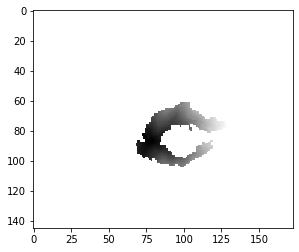

In [37]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

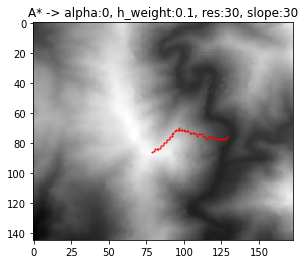

In [38]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope, 'A*')

# Dijkstra 

In [39]:
from dijkstra import dijkstraFromSrc, dijkstraTillRoad
from dijkstra import showPath

- Starting from source, covers whole bbox

In [40]:
alpha = 0
h_weight = 0.1
slope = 30

distFromSrc, parentMat = dijkstraFromSrc(map_data[0], map_data[1], src_latIdx, src_lonIdx, alpha, h_weight, resolution, slope)

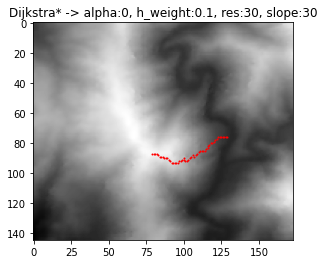

In [41]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope, 'Dijkstra*')

- Starting from source,  runs till road found

In [42]:
alpha = 0
h_weight = 0.1
slope = 30

distFromSrc, parentMat, (des_latIdx, des_lonIdx) = dijkstraTillRoad(map_data[0], map_data[1], src_latIdx, src_lonIdx, alpha, h_weight, resolution, slope)

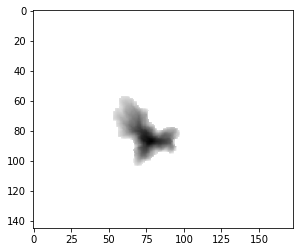

In [43]:
plt.imshow(distFromSrc, cmap='gray')
plt.show()

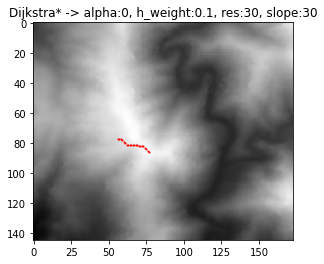

In [44]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope, 'Dijkstra*')